In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gdown

In [2]:
import os

url = 'https://drive.google.com/uc?id=1lA_elXZuZbMK52waLT3VYAG7B_WdYeNo'
output = '../data/raw_analyst_ratings.csv'
# gdown.download(url, output, quiet=False)
df = pd.read_csv(output)

In [3]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [5]:
# check if we have duplicates
df[df.duplicated()]

,Unnamed: 0,headline,url,publisher,date,stock


Descriptive Statistics

In [6]:
# Headline Length Analysis
df['headline_length'] = df['headline'].apply(len)

print("Basic Headline Length Statistics:")
print(df['headline_length'].describe())

Basic Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


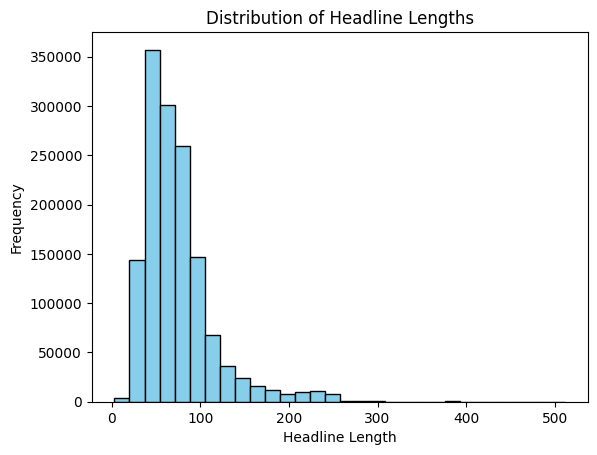

In [7]:
# Histogram
plt.hist(df['headline_length'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Headline Lengths")
plt.xlabel("Headline Length")
plt.ylabel("Frequency")
plt.show()

In [8]:
# Articles Per Publisher
publisher_counts = df['publisher'].value_counts()

print("Top Publishers by Article Count:")
print(publisher_counts.head(10))

Top Publishers by Article Count:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


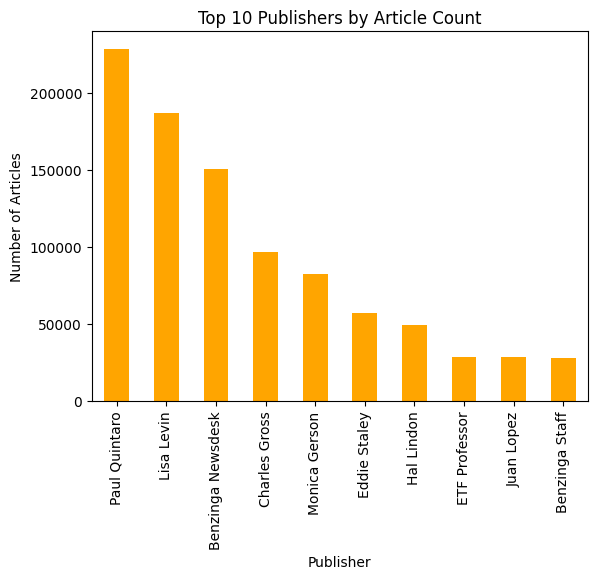

In [9]:
# Bar chart
publisher_counts[:10].plot(kind='bar', color='orange')
plt.title("Top 10 Publishers by Article Count")
plt.xlabel("Publisher")
plt.ylabel("Number of Articles")
plt.show()

In [10]:
df['date'] = pd.to_datetime(df['date'], format='mixed', utc=True)

# Extract day, month, year
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

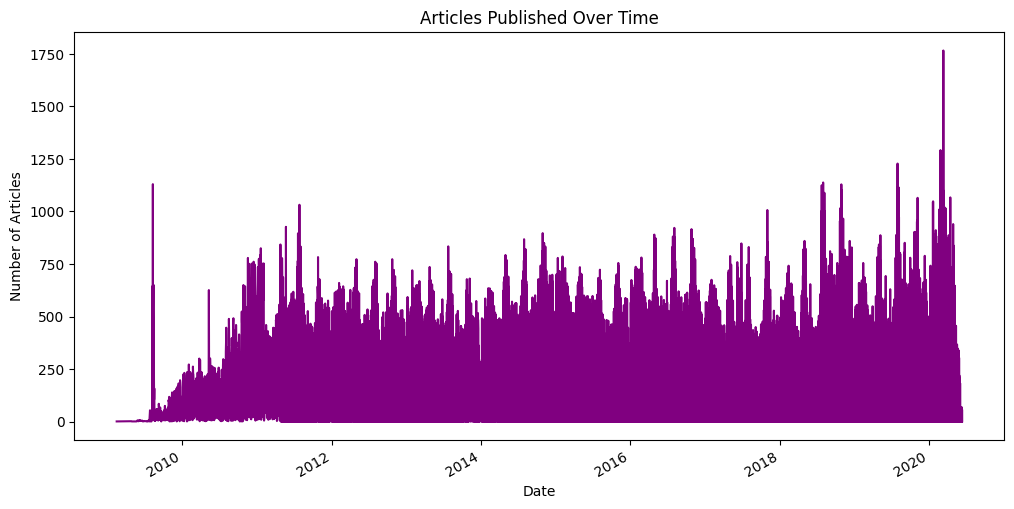

In [11]:
# Plot articles over time
df['date'].value_counts().sort_index().plot(figsize=(12, 6), color='purple')
plt.title("Articles Published Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.show()

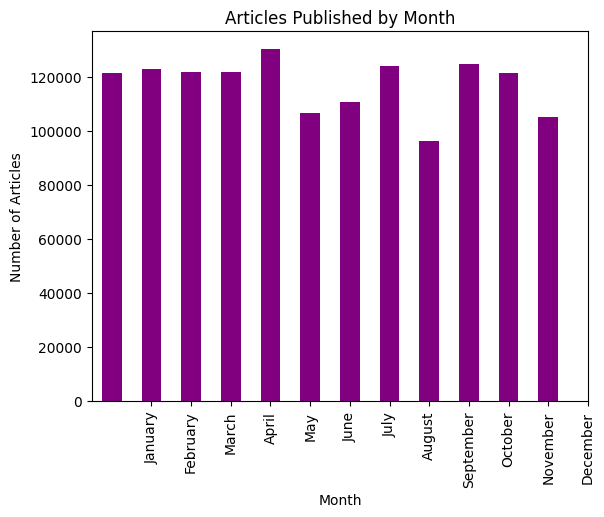

In [14]:
# Plot articles over month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['month'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title("Articles Published by Month")
plt.xlabel("Month")
plt.ylabel("Number of Articles")
plt.xticks(ticks=np.arange(1, 13), labels=month_order)
plt.show()

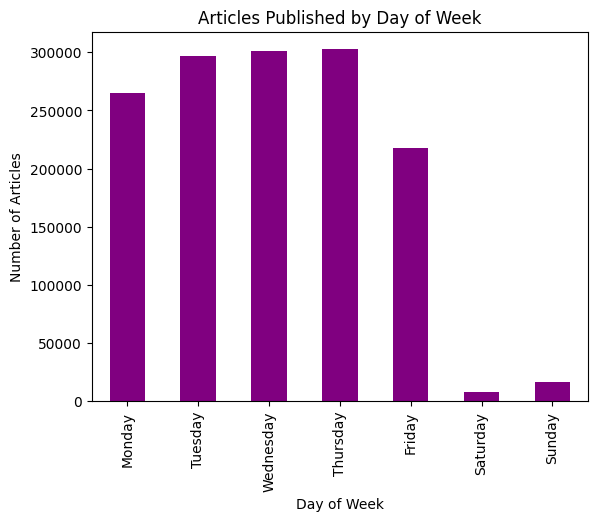

In [15]:
# Plot articles over day of week
df['day_of_week'] = df['date'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)
df['day_of_week'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title("Articles Published by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Articles")
plt.show()


Text Analysis

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tesfa\AppData\Roaming\nltk_data...


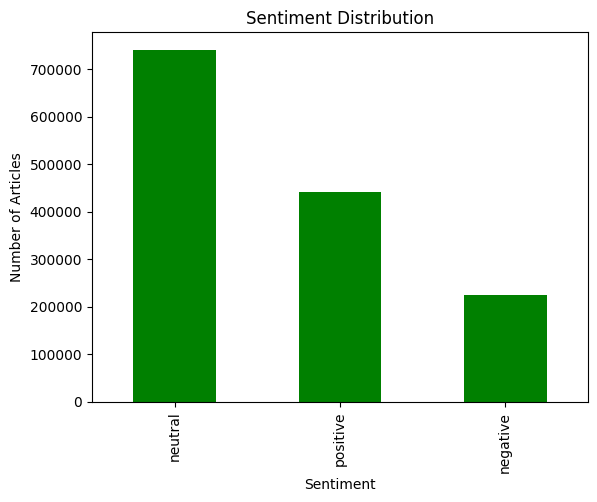

In [16]:
#  Sentiment Analysis
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

df['sentiment'] = df['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiment into positive, negative, or neutral
df['sentiment_label'] = df['sentiment'].apply(
    lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral')
)

# Sentiment distribution
df['sentiment_label'].value_counts().plot(kind='bar', color='green')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Articles")
plt.show()

In [17]:
# Topic Modeling
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=20)
tfidf_matrix = vectorizer.fit_transform(df['headline'])
keywords = vectorizer.get_feature_names_out()

print("Top Keywords Extracted:")
print(keywords)

Top Keywords Extracted:
['announces' 'benzinga' 'buy' 'downgrades' 'earnings' 'eps' 'est' 'market'
 'mid' 'price' 'pt' 'raises' 'reports' 'sales' 'shares' 'stocks' 'trading'
 'update' 'vs' 'week']


Time Series Analysis

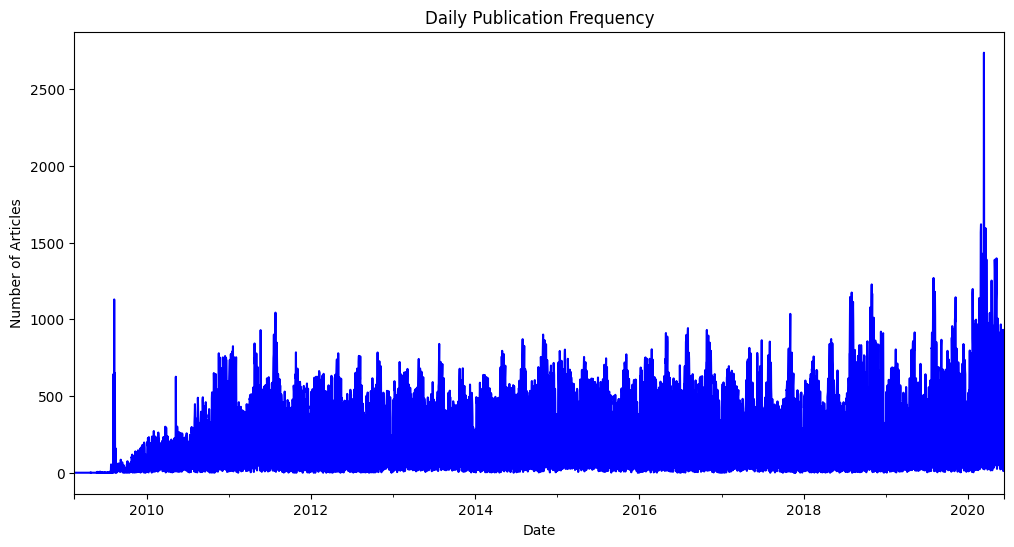

In [19]:
# Publication Frequency
publication_freq = df.resample('D', on='date').size()

publication_freq.plot(figsize=(12, 6), color='blue')
plt.title("Daily Publication Frequency")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.show()

Publisher Analysis 

Top Domains:
domain
unknown                   1399240
benzinga.com                 7937
gmail.com                     139
andyswan.com                    5
investdiva.com                  2
tothetick.com                   2
eosdetroit.io                   1
forextraininggroup.com          1
stockmetrix.net                 1
Name: count, dtype: int64


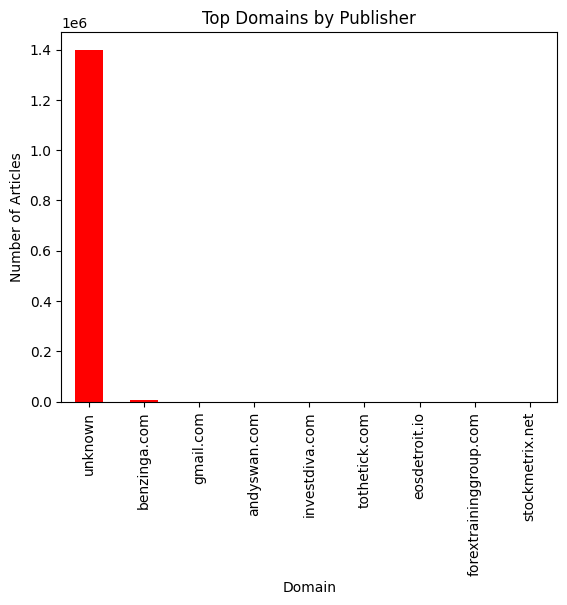

In [20]:
# Domain Analysis

# 1. Extract domains if publishers use email addresses:
import re

def extract_domain(publisher):
    match = re.search(r"@([\w.]+)", publisher)
    return match.group(1) if match else "unknown"

df['domain'] = df['publisher'].apply(extract_domain)
domain_counts = df['domain'].value_counts()

print("Top Domains:")
print(domain_counts.head(10))

domain_counts[:10].plot(kind='bar', color='red')
plt.title("Top Domains by Publisher")
plt.xlabel("Domain")
plt.ylabel("Number of Articles")
plt.show()


In [21]:
df.to_csv("eda_results.csv", index=False)